# Classification des données covid

In [3]:
!conda install -c conda-forge tslearn

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - tslearn

Current channels:

  - https://conda.anaconda.org/conda-forge/osx-arm64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/osx-arm64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-arm64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [1]:
# import des librairies 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans

In [5]:
df = pd.read_csv("time_series_covid19_deaths_US.csv")

In [6]:
df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/13/22,11/14/22,11/15/22,11/16/22,11/17/22,11/18/22,11/19/22,11/20/22,11/21/22,11/22/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,229,229,229,229,229,229,229,229,229,229
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,716,716,716,716,716,716,716,716,716,716
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,103,103,103,103,103,103,103,103,103,103
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,108,108,108,108,108,108,108,108,108,108
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,258,258,258,258,258,258,258,258,258,258


In [7]:
df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2'], axis = 1)

In [8]:
df['Country_Region'].unique()

array(['US'], dtype=object)

In [9]:
df = df.drop('Country_Region', axis = 1)

In [10]:
df = df.drop(['Lat', 'Long_', 'Combined_Key'],axis =1)

In [11]:
df.head()

,Province_State,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,11/13/22,11/14/22,11/15/22,11/16/22,11/17/22,11/18/22,11/19/22,11/20/22,11/21/22,11/22/22
0,Alabama,55869,0,0,0,0,0,0,0,0,...,229,229,229,229,229,229,229,229,229,229
1,Alabama,223234,0,0,0,0,0,0,0,0,...,716,716,716,716,716,716,716,716,716,716
2,Alabama,24686,0,0,0,0,0,0,0,0,...,103,103,103,103,103,103,103,103,103,103
3,Alabama,22394,0,0,0,0,0,0,0,0,...,108,108,108,108,108,108,108,108,108,108
4,Alabama,57826,0,0,0,0,0,0,0,0,...,258,258,258,258,258,258,258,258,258,258


In [12]:
df['Province_State'].unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [13]:
df2 = df.groupby('Province_State').sum()

In [14]:
pop = df2['Population']
pop

Province_State
Alabama                      4903185
Alaska                        740995
American Samoa                 55641
Arizona                      7278717
Arkansas                     3017804
California                  39512223
Colorado                     5758736
Connecticut                  3565287
Delaware                      973764
Diamond Princess                   0
District of Columbia          705749
Florida                     21477737
Georgia                     10617423
Grand Princess                     0
Guam                          164229
Hawaii                       1415872
Idaho                        1787065
Illinois                    12671821
Indiana                      6732219
Iowa                         3155070
Kansas                       2913314
Kentucky                     4467673
Louisiana                    4648794
Maine                        1344212
Maryland                     6045680
Massachusetts                6892503
Michigan               

In [15]:
df2 = df2.drop('Population', axis = 1)

In [16]:
df2

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/13/22,11/14/22,11/15/22,11/16/22,11/17/22,11/18/22,11/19/22,11/20/22,11/21/22,11/22/22
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,20608,20608,20608,20617,20617,20617,20617,20617,20617,20617
Alaska,0,0,0,0,0,0,0,0,0,0,...,1413,1413,1436,1436,1436,1436,1436,1436,1436,1436
American Samoa,0,0,0,0,0,0,0,0,0,0,...,34,34,34,34,34,34,34,34,34,34
Arizona,0,0,0,0,0,0,0,0,0,0,...,31613,31613,31613,31647,31647,31647,31647,31647,31647,31647
Arkansas,0,0,0,0,0,0,0,0,0,0,...,12525,12525,12526,12528,12530,12533,12535,12535,12535,12540
California,0,0,0,0,0,0,0,0,0,0,...,97106,97140,97149,97165,97283,97290,97290,97290,97310,97317
Colorado,0,0,0,0,0,0,0,0,0,0,...,13482,13485,13504,13506,13520,13526,13526,13526,13529,13558
Connecticut,0,0,0,0,0,0,0,0,0,0,...,11537,11537,11549,11559,11559,11559,11559,11559,11559,11572
Delaware,0,0,0,0,0,0,0,0,0,0,...,3148,3161,3148,3163,3163,3163,3163,3163,3163,3163


In [17]:
df3 = df2
df3.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/13/22,11/14/22,11/15/22,11/16/22,11/17/22,11/18/22,11/19/22,11/20/22,11/21/22,11/22/22
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,20608,20608,20608,20617,20617,20617,20617,20617,20617,20617
Alaska,0,0,0,0,0,0,0,0,0,0,...,1413,1413,1436,1436,1436,1436,1436,1436,1436,1436
American Samoa,0,0,0,0,0,0,0,0,0,0,...,34,34,34,34,34,34,34,34,34,34
Arizona,0,0,0,0,0,0,0,0,0,0,...,31613,31613,31613,31647,31647,31647,31647,31647,31647,31647
Arkansas,0,0,0,0,0,0,0,0,0,0,...,12525,12525,12526,12528,12530,12533,12535,12535,12535,12540


In [18]:
for x in list(df3.columns): 
  df3[x] = df3[x] / pop 

In [19]:
df3 = df3.drop([x for x in df3.index if 'Princess' in x])
df3

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/13/22,11/14/22,11/15/22,11/16/22,11/17/22,11/18/22,11/19/22,11/20/22,11/21/22,11/22/22
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.004203,0.004203,0.004203,0.004205,0.004205,0.004205,0.004205,0.004205,0.004205,0.004205
Alaska,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.001907,0.001907,0.001938,0.001938,0.001938,0.001938,0.001938,0.001938,0.001938,0.001938
American Samoa,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000611,0.000611,0.000611,0.000611,0.000611,0.000611,0.000611,0.000611,0.000611,0.000611
Arizona,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.004343,0.004343,0.004343,0.004348,0.004348,0.004348,0.004348,0.004348,0.004348,0.004348
Arkansas,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.004150,0.004150,0.004151,0.004151,0.004152,0.004153,0.004154,0.004154,0.004154,0.004155
California,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.002458,0.002458,0.002459,0.002459,0.002462,0.002462,0.002462,0.002462,0.002463,0.002463
Colorado,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.002341,0.002342,0.002345,0.002345,0.002348,0.002349,0.002349,0.002349,0.002349,0.002354
Connecticut,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.003236,0.003236,0.003239,0.003242,0.003242,0.003242,0.003242,0.003242,0.003242,0.003246
Delaware,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.003233,0.003246,0.003233,0.003248,0.003248,0.003248,0.003248,0.003248,0.003248,0.003248


In [20]:
model = TimeSeriesKMeans(n_clusters=10, metric="dtw")
prediction = model.fit_predict(df3)

In [21]:
prediction

array([1, 2, 3, 1, 1, 9, 9, 4, 4, 2, 6, 6, 9, 5, 4, 4, 6, 4, 4, 6, 6, 2,
       0, 4, 6, 9, 1, 4, 4, 9, 6, 2, 6, 1, 6, 0, 4, 3, 8, 1, 2, 6, 7, 8,
       8, 8, 1, 4, 7, 5, 5, 0, 2, 1, 0, 4])

In [22]:
len(prediction)

56

In [23]:
len(df3)

56

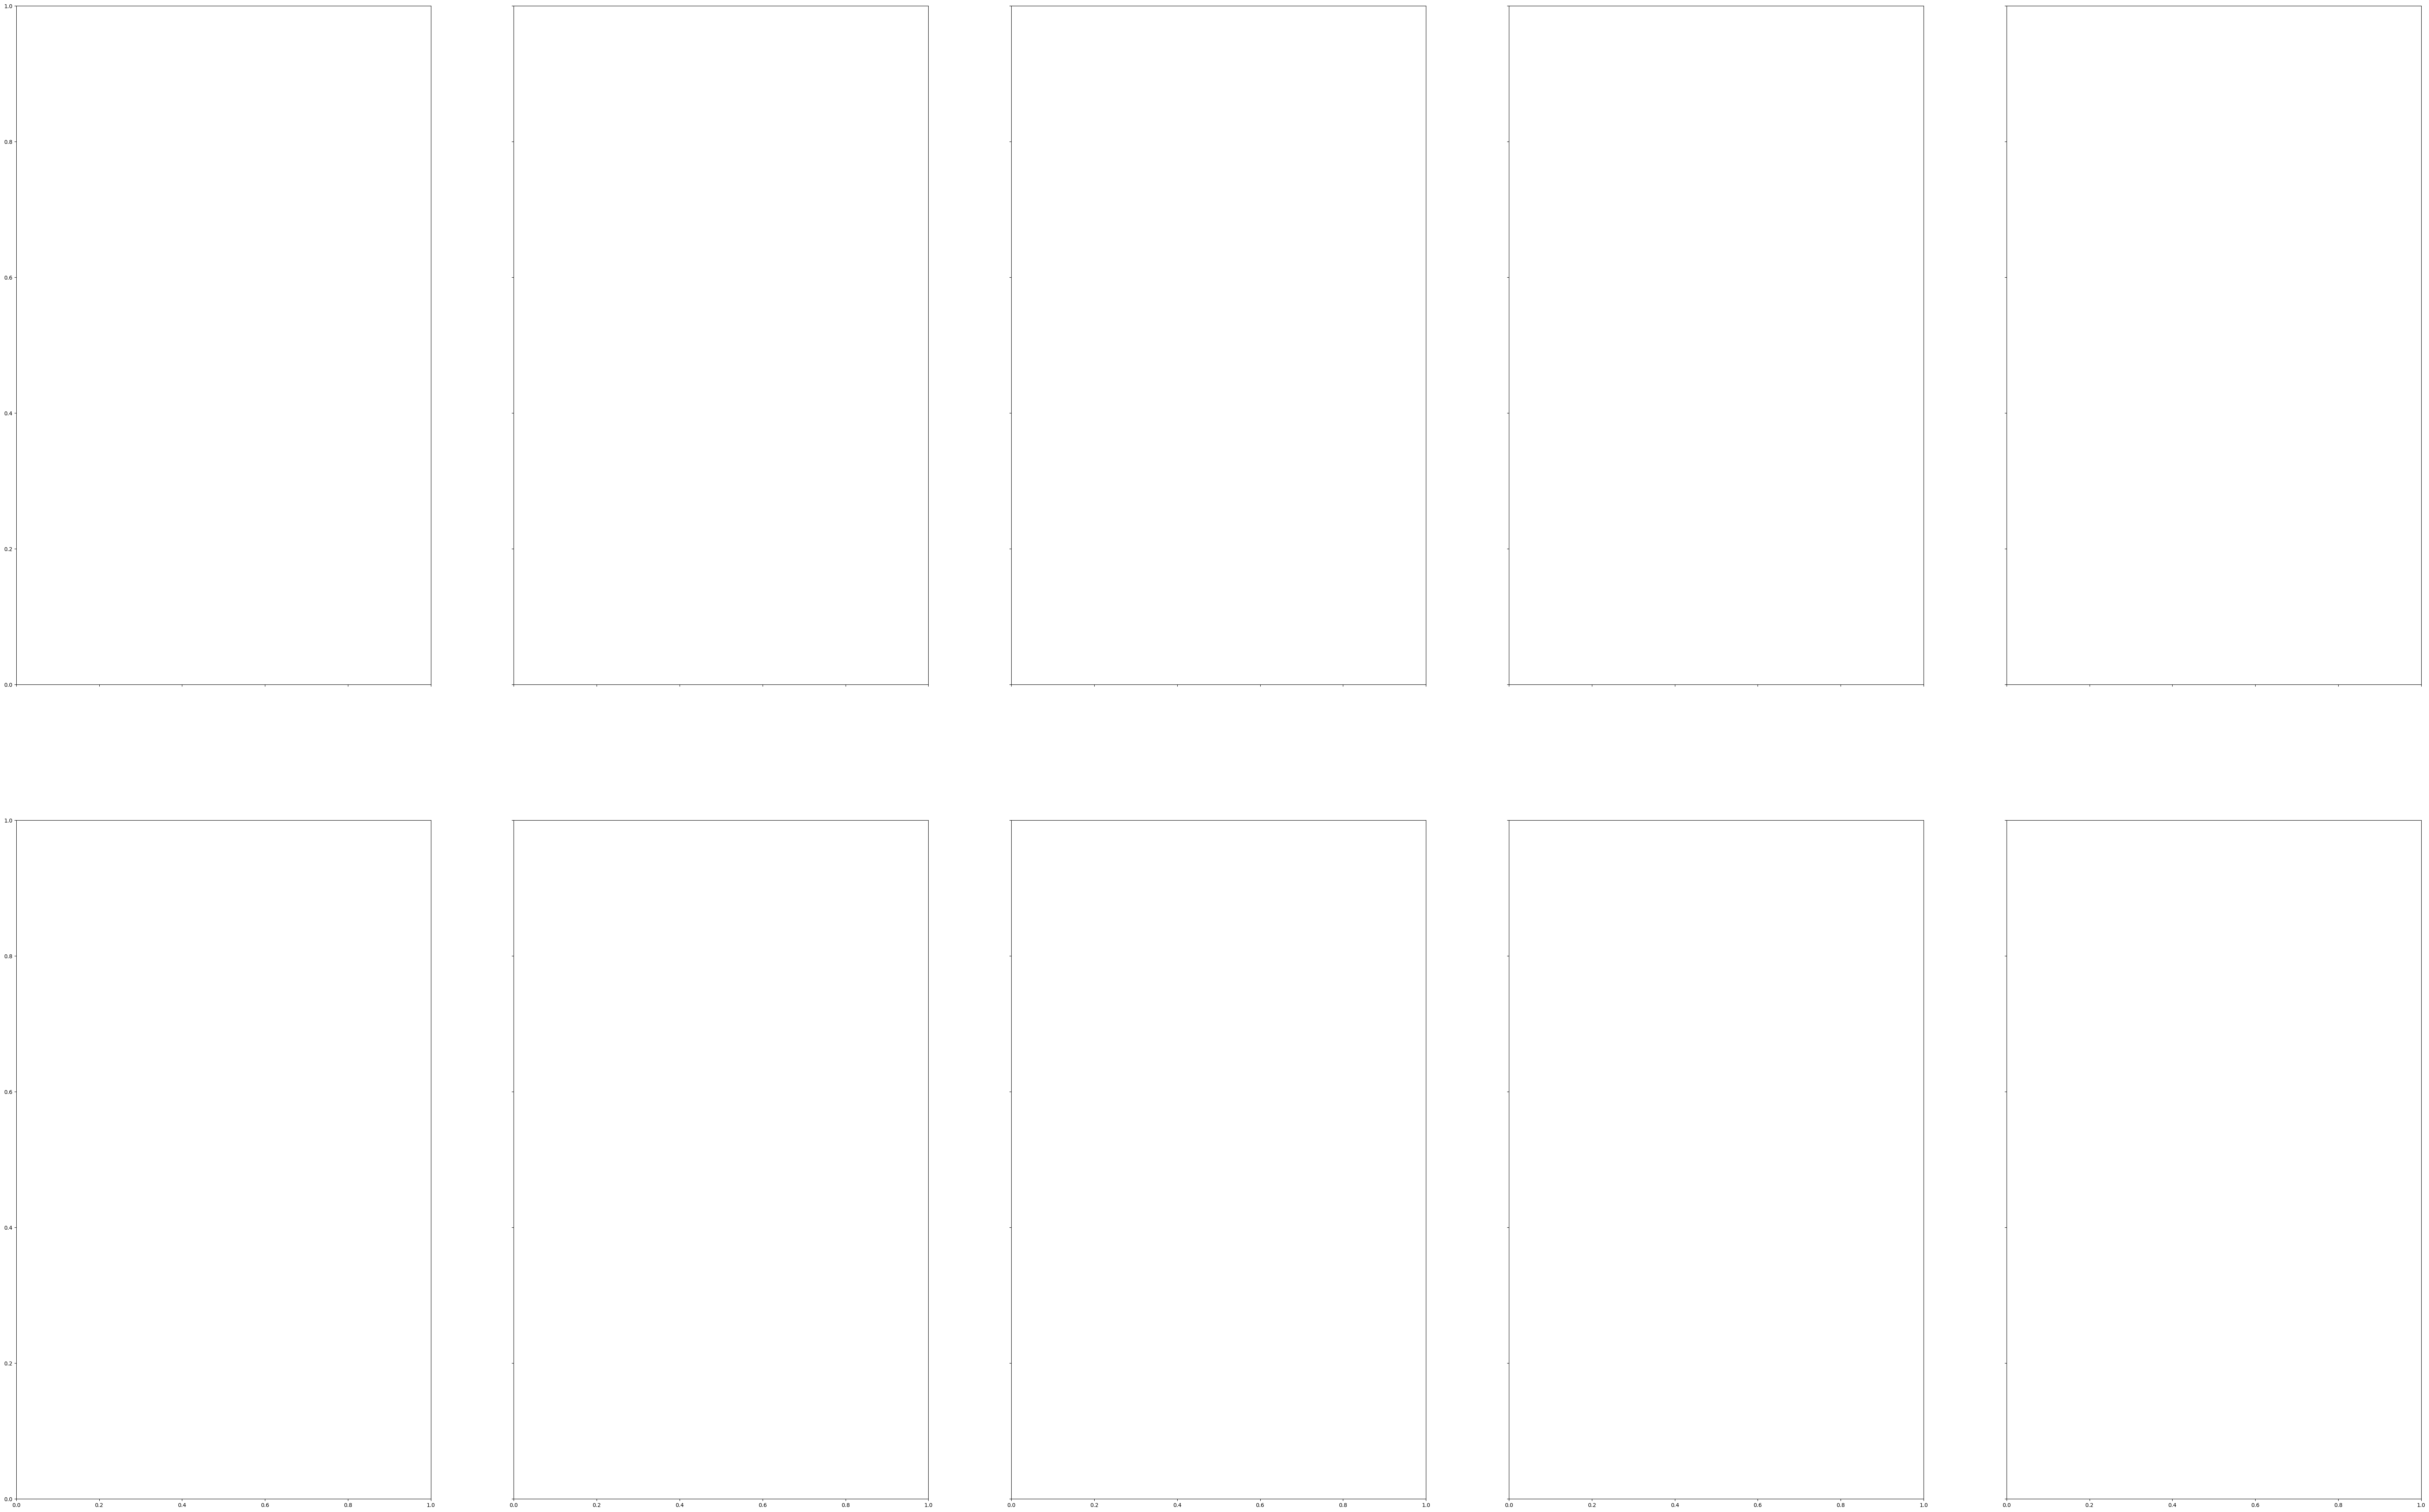

In [24]:
fig, axes = plt.subplots(2,5, figsize = (80,50), sharex= True, sharey = True);

In [25]:
for k in range(len(df3)): 
  axes[prediction[k]//5, prediction[k]%5].plot(df3.iloc[k])

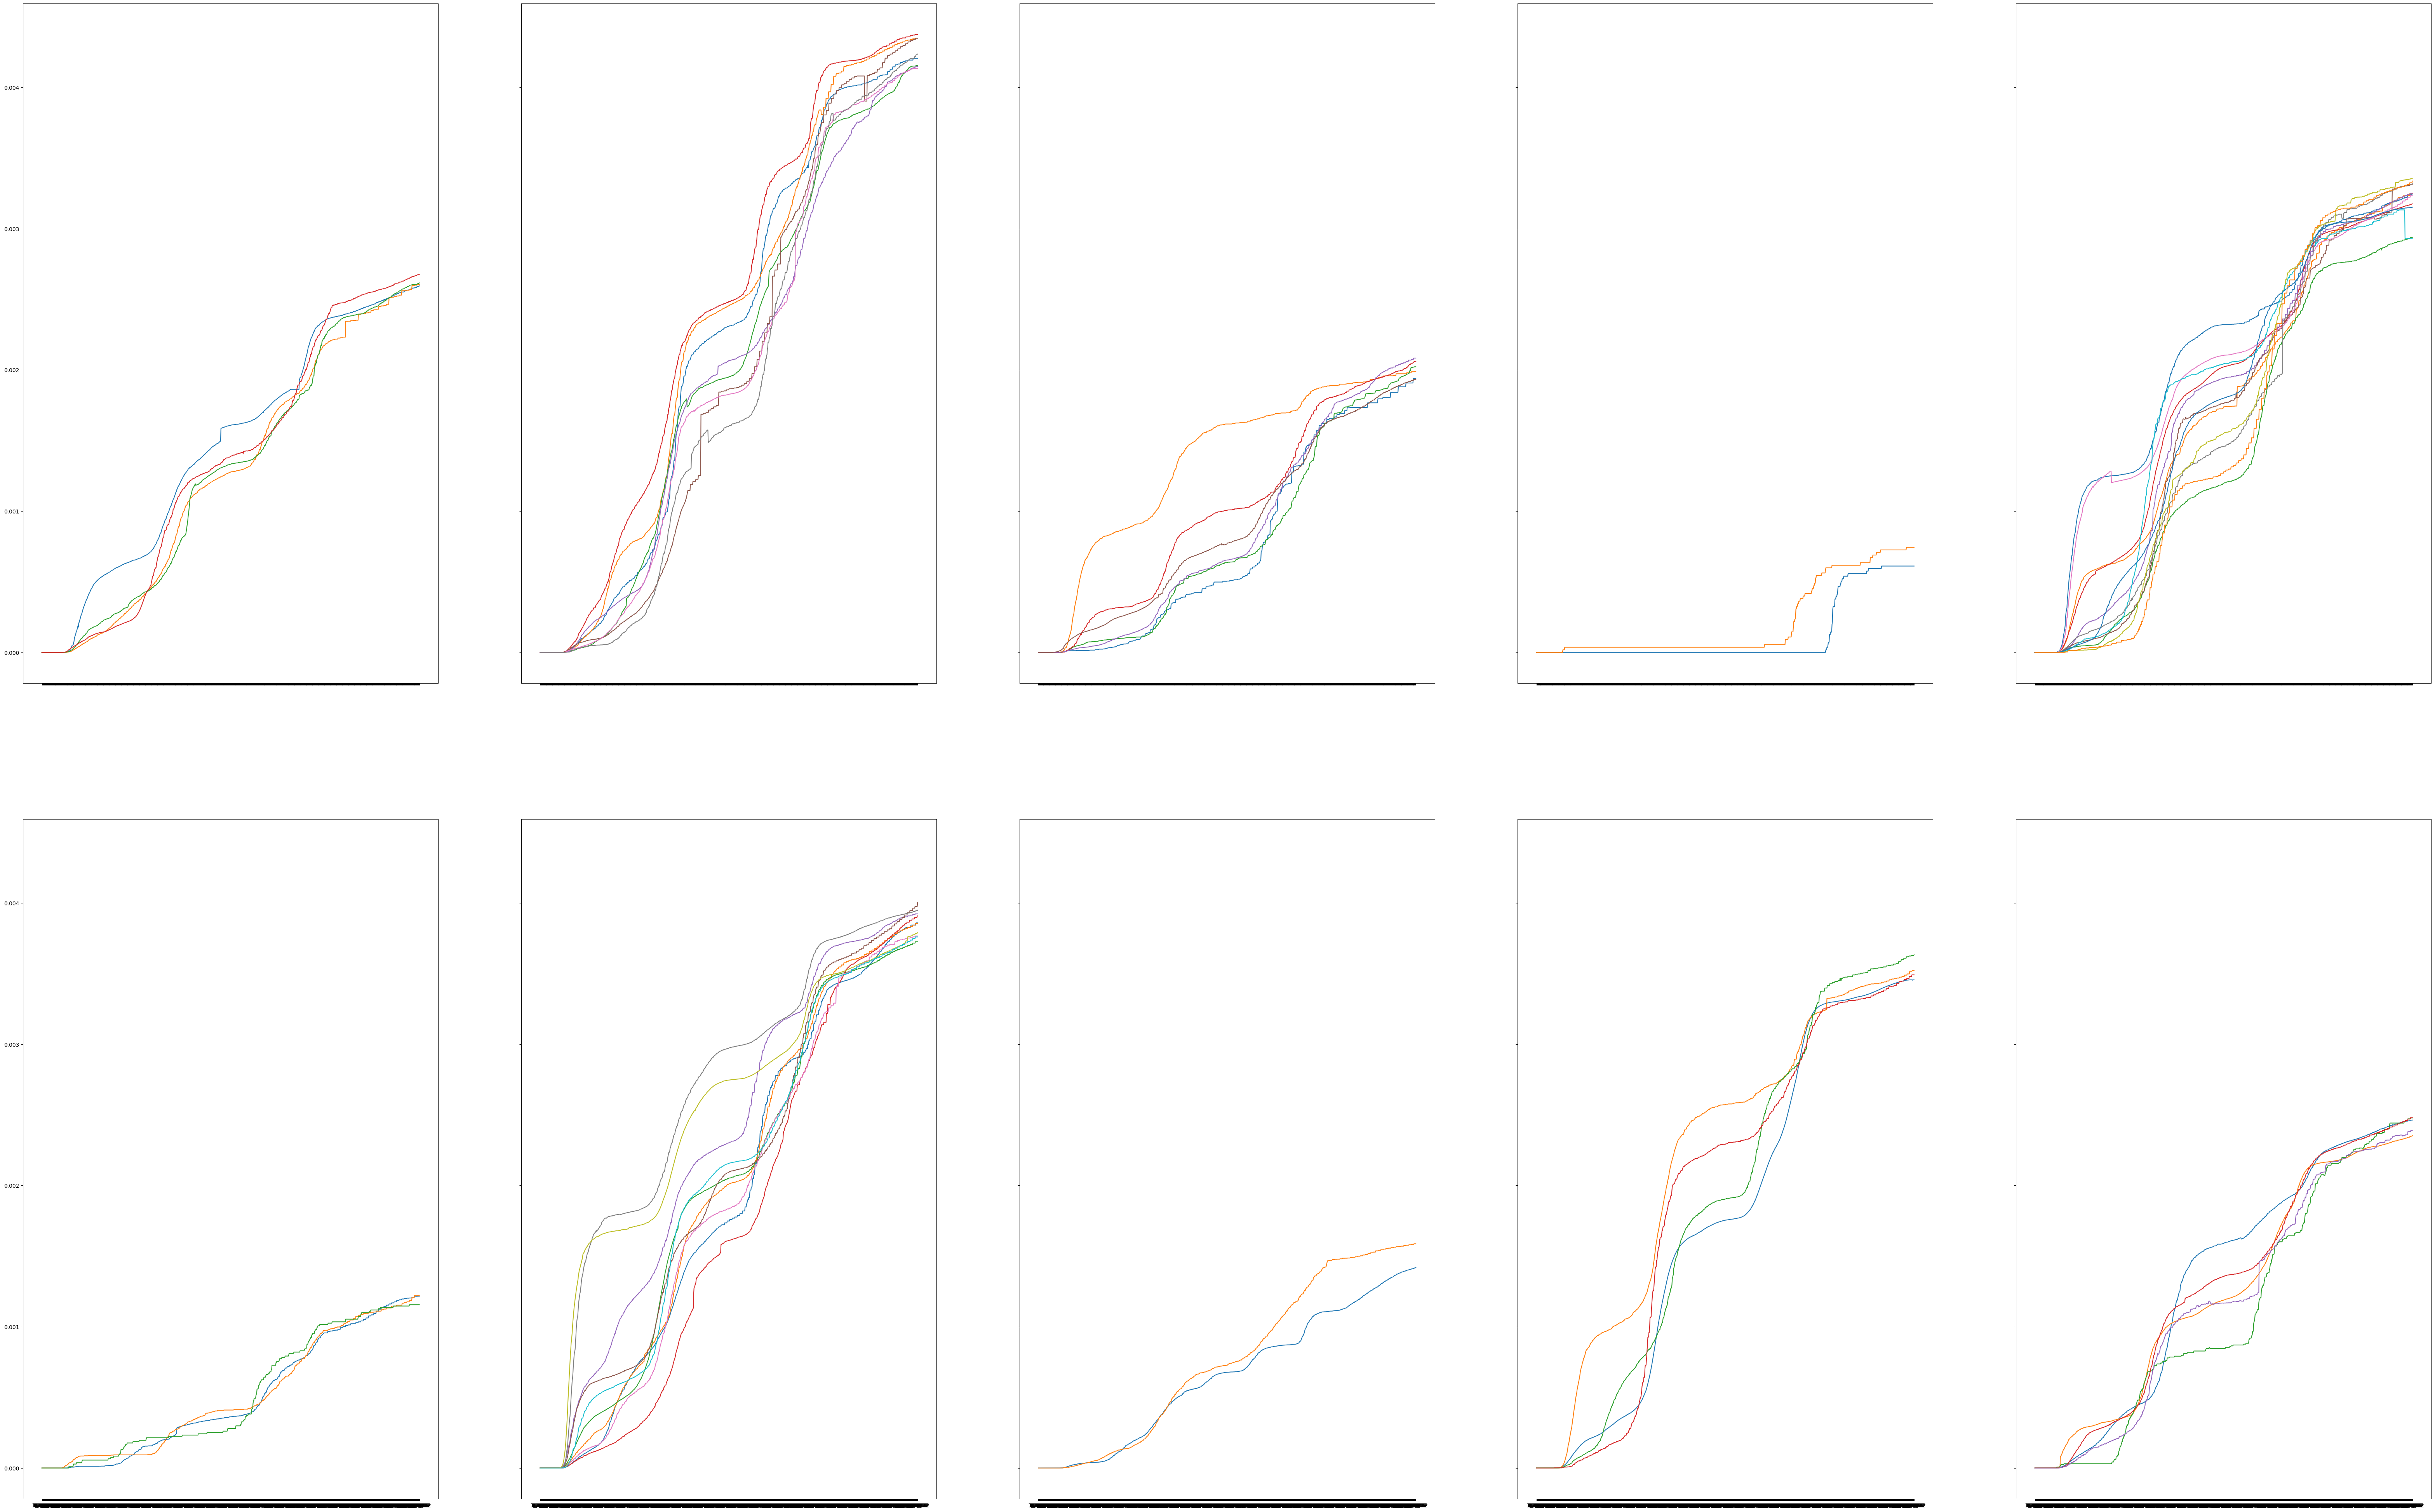

In [26]:
fig

## Tests sur les données mondiales

In [43]:
df = pd.read_csv('time_series_covid19_deaths_global.csv')
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/13/22,11/14/22,11/15/22,11/16/22,11/17/22,11/18/22,11/19/22,11/20/22,11/21/22,11/22/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7829,7829,7829,7830,7830,7830,7831,7831,7832,7833
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3593,3594,3594,3594,3594,3594,3594,3594,3594,3594
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,155,155,155,156,156,156,156,156,156,156
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917


In [44]:
df = df.drop(['Province/State','Lat','Long'],axis = 1)

In [53]:
df2 = df.groupby('Country/Region').sum()
df2 = df2.iloc[:, :400]

In [54]:
model = TimeSeriesKMeans(n_clusters=25, metric="dtw")
prediction2 = model.fit_predict(df2)
prediction2

array([15, 15, 23,  0, 20,  0,  0, 11, 23, 20, 22, 23,  0, 20, 14,  0, 15,
       10,  0,  0,  0, 22,  7,  0,  5,  0, 22,  0, 23,  0,  0,  0, 20, 10,
        0,  0, 10, 18, 17,  0,  0, 20, 23,  0, 18,  0,  0, 10, 15,  0,  0,
        0, 23, 24, 22, 15,  0,  0, 20, 20, 15,  0, 20, 16,  0,  0, 23,  3,
       20, 18,  0, 18,  0,  0,  0,  0,  0,  7,  4,  0,  1,  8, 17,  4,  7,
       18,  9, 20, 14,  7, 23, 15,  0,  0, 15, 15, 20, 15,  0, 15,  7,  0,
        0, 15,  0, 23, 20,  0,  0, 20, 20,  0,  0,  0,  0, 20,  0, 12,  0,
        7,  0,  0, 20, 14, 20, 20,  0, 15,  4,  0,  0,  0, 15, 23, 20, 15,
        4,  0, 18,  0, 23, 13, 22, 21, 24,  0, 10, 16,  0,  0,  0,  0,  0,
        0,  0, 18, 20,  7,  0,  0,  0, 18,  7,  0,  0, 11,  0,  3, 20, 15,
        0,  0,  4, 22, 20,  0,  0,  0,  0,  0,  0,  0,  0, 14, 19,  0,  2,
        0, 19, 20,  6, 20, 20,  0, 15,  0, 15,  0, 20, 20, 15])

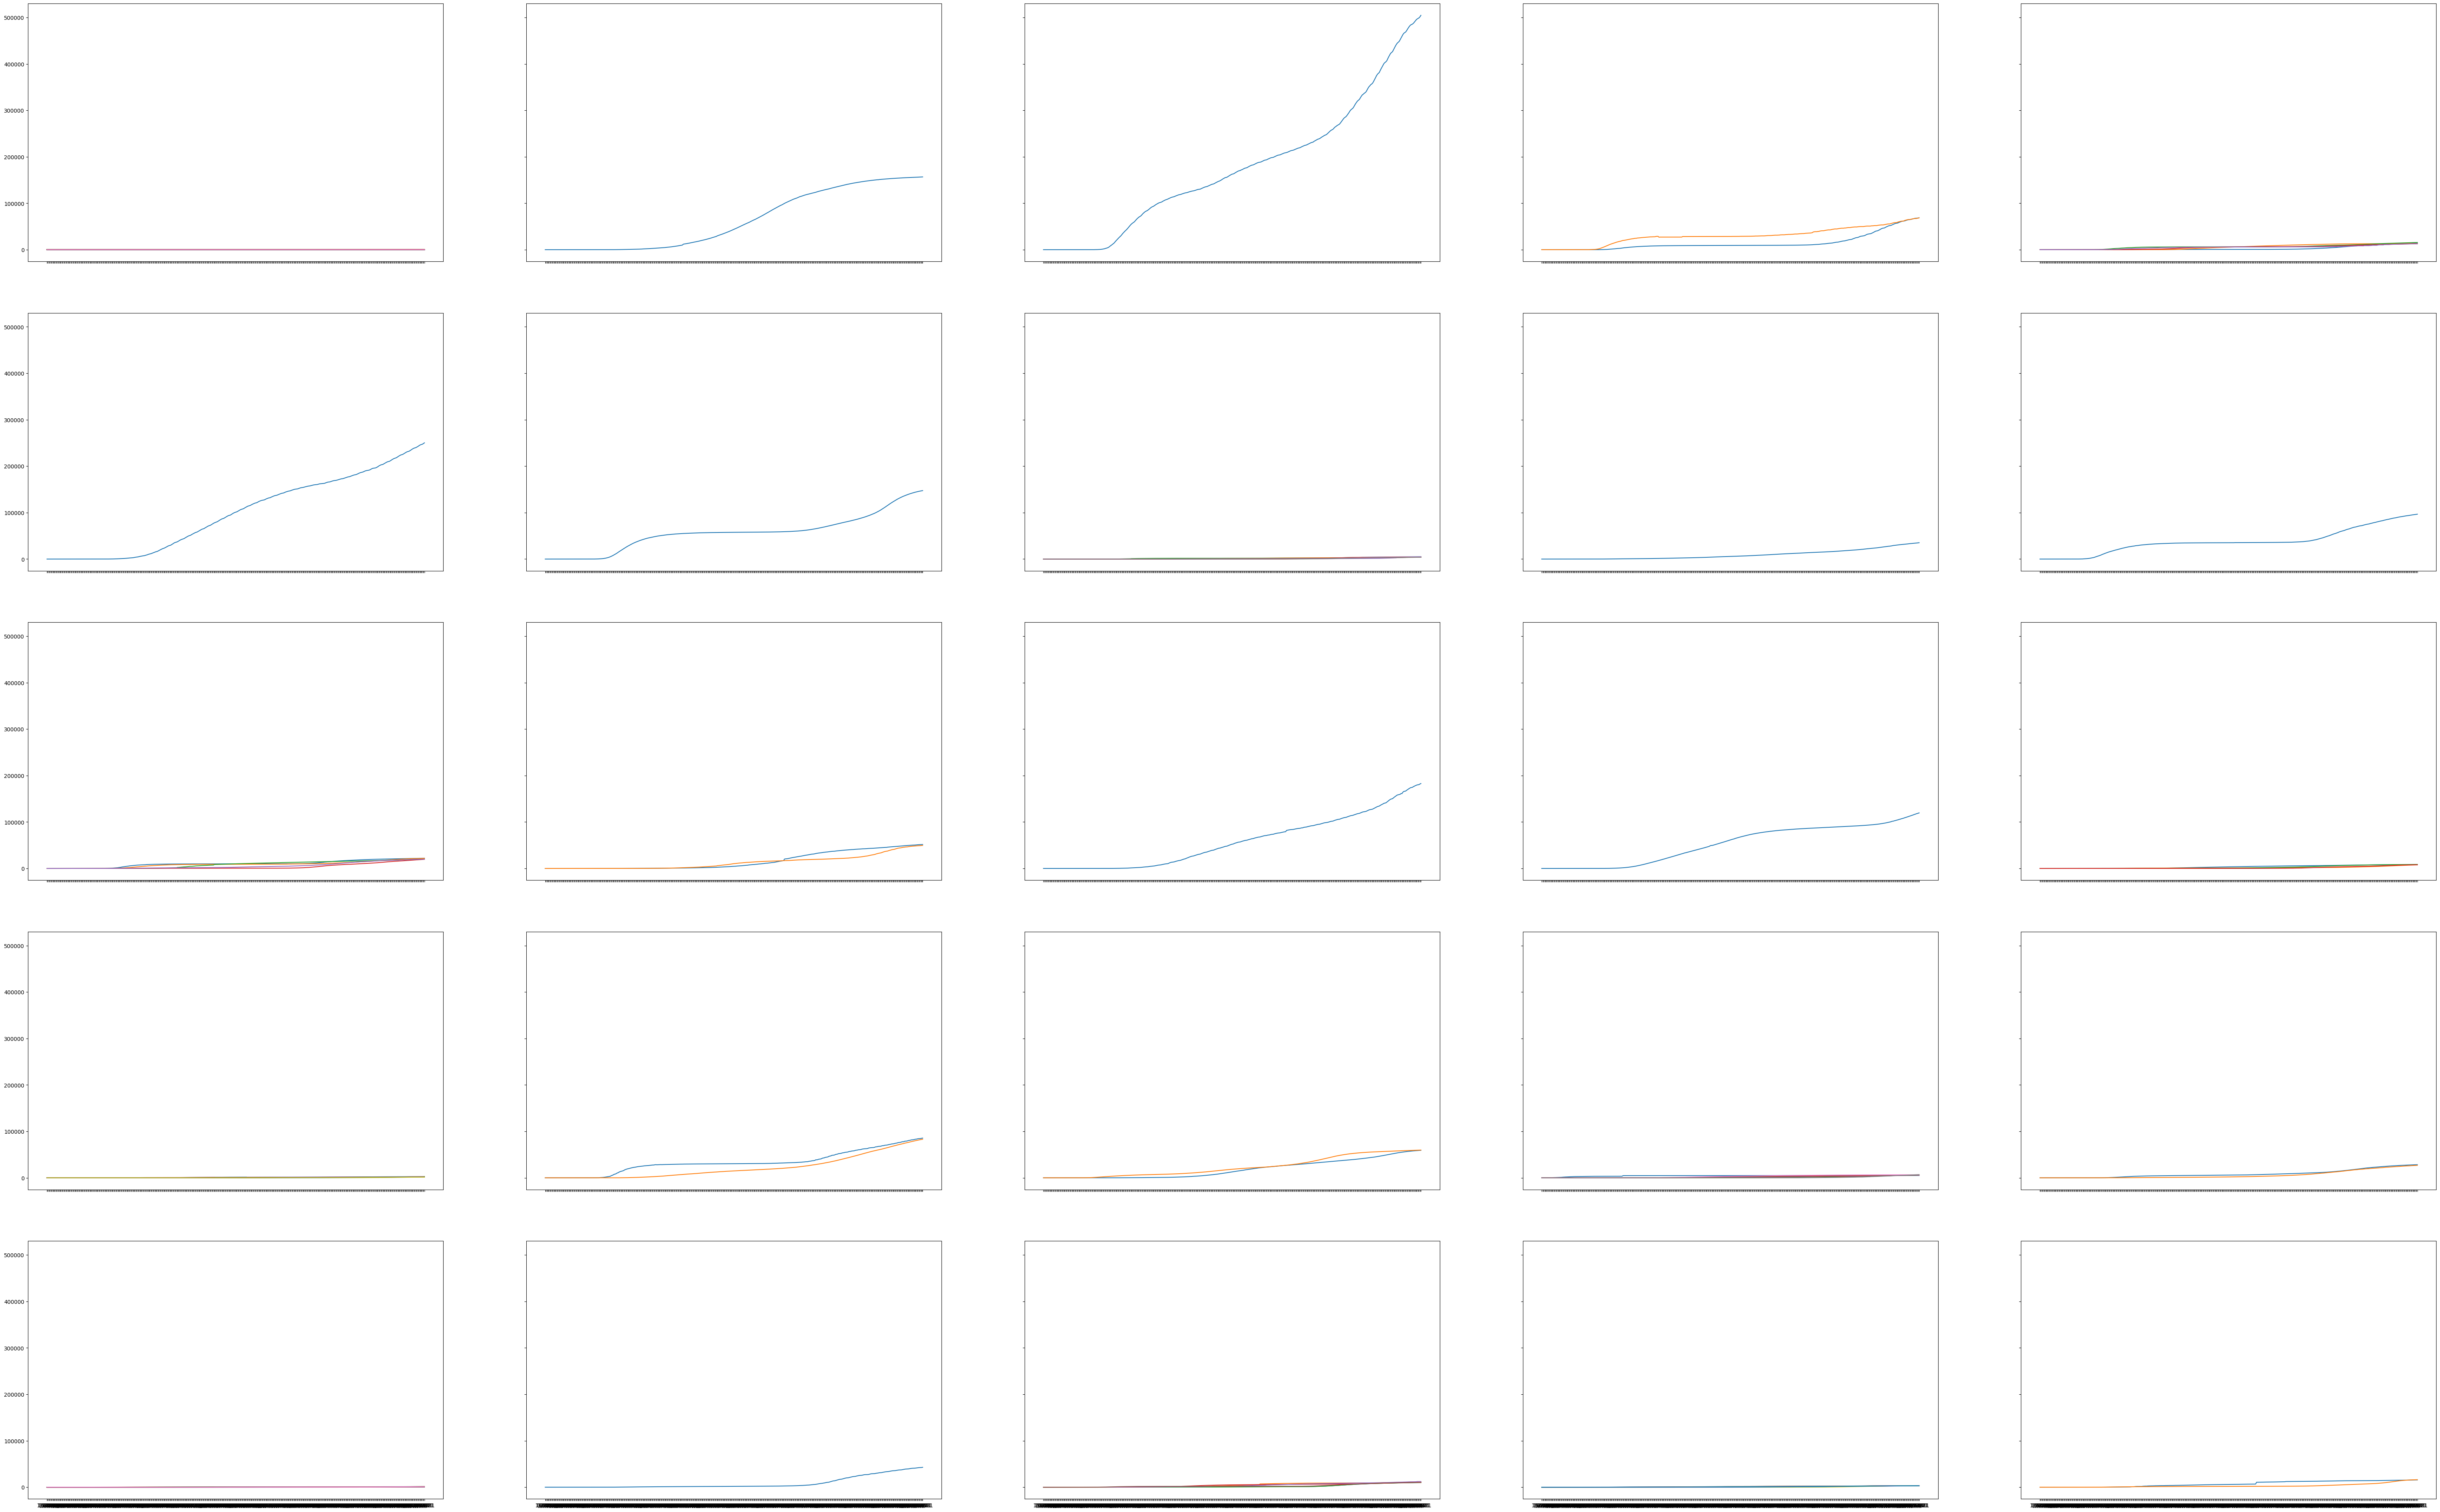

In [55]:
fig, axes = plt.subplots(5,5, figsize = (80,50), sharex= True, sharey = True);
for k in range(len(df2)): 
  axes[prediction2[k]//5, prediction2[k]%5].plot(df2.iloc[k])

## Faire une classification 

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)
